# 利用GAN生成CIC2018_picture-demo



In [25]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

# 导入数据

In [26]:
from tensorflow.examples.tutorials.mnist import input_data

# image load
from tflearn.data_utils import image_preloader
from tflearn.data_utils import shuffle
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

train_dataset_file = './train1.txt'
test_dataset_file = './test1.txt'
X,Y = image_preloader(train_dataset_file, image_shape=(9,9),mode='file',normalize=True, categorical_labels=True, grayscale=True)
X = shuffle(X)[0]

# print(X)
print(len(X))

[[[[0.3137255 ]
   [0.80784315]
   [0.3529412 ]
   ...
   [0.00392157]
   [0.        ]
   [0.11764706]]

  [[0.93333334]
   [0.3529412 ]
   [0.        ]
   ...
   [0.        ]
   [0.00392157]
   [0.01568628]]

  [[0.02352941]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.02352941]
   [0.00392157]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.00392157]
   [0.        ]
   [0.        ]
   ...
   [0.38431373]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.83137256]
   [0.        ]
   [0.02352941]
   ...
   [0.73333335]
   [0.99607843]
   [1.        ]]

  [[0.        ]
   [0.5686275 ]
   [0.4       ]
   ...
   [0.15686275]
   [0.12941177]
   [0.34117648]]

  [[0.7607843 ]
   [0.        ]
   [0.8156863 ]
   ...
   [0.        ]
   [0.29411766]
   [0.19607843]]

  ...

  [[0.28235295]
   [0.7137255 ]
   [0. 

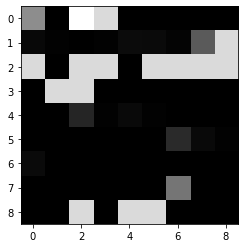

In [27]:
img = X[50]
# img = mnist.train.images[50]
plt.imshow(img.reshape((9, 9)), cmap='Greys_r')

# 构建模型

- inputs
- generator
- descriminator
- loss && optimizer

## Inputs

In [28]:
def get_inputs(real_size, noise_size):
    """
    真实图像tensor与噪声图像tensor
    """
    real_img = tf.placeholder(tf.float32, [None, real_size], name='real_img')
    noise_img = tf.placeholder(tf.float32, [None, noise_size], name='noise_img')
    
    return real_img, noise_img

## generator

In [29]:
def get_generator(noise_img, out_dim, n_units, reuse=False, alpha=0.01):
    """
    生成器
    
    noise_img: 生成器的输入
    out_dim: 生成器输出tensor的size，这里应该为9*9=81
    alpha: leaky ReLU系数
    """
    with tf.variable_scope("generator", reuse=reuse):
        # hidden layer
        hidden1 = tf.layers.dense(noise_img, n_units)
        # leaky ReLU
        hidden1 = tf.maximum(alpha * hidden1, hidden1)
        # dropout
    
# #         network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")  #卷积处理3*3*32
# #         network = max_pool_2d(network, 2)  #池化处理2*2
# #         network = local_response_normalization(network)  #标准化张量    

#         network = fully_connected(network, 64, activation='tanh')
#         network = fully_connected(network, 32, activation='tanh')
#         network = fully_connected(network, 10, activation='tanh')
#         network = dropout(network, 0.2)
#         network = fully_connected(network, 2, activation='softmax')
        
        # logits & outputs
        logits = tf.layers.dense(hidden1, out_dim)
        outputs = tf.tanh(logits)
        
        return logits, outputs

## Discriminator

In [30]:
# image load
from tflearn.data_utils import image_preloader
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

# network build
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# img_prep = ImagePreprocessing()
# img_prep.add_featurewise_zero_center()
# img_prep.add_featurewise_stdnorm()
# img_aug = ImageAugmentation()
    
def get_discriminator(img, n_units, reuse=False, alpha=0.01):
    """
    判别器
    
    n_units: 隐层结点数量
    alpha: Leaky ReLU系数
    """

    with tf.variable_scope("discriminator", reuse=reuse):
        
        # hidden layer
        
        hidden1 = tf.layers.dense(img, n_units)
        hidden1 = tf.maximum(alpha * hidden1, hidden1)
        # Building convolutional network
    
        logits = tf.layers.dense(hidden1, 1)
        
        outputs = tf.sigmoid(logits)
        
#         network = input_data(shape=[None, 81], placeholder=img, name='input')
    
#         network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")  #卷积处理3*3*32
#         network = max_pool_2d(network, 2)  #池化处理2*2
#         network = local_response_normalization(network)  #标准化张量    

#         network = fully_connected(network, 64, activation='tanh')
#         network = fully_connected(network, 32, activation='tanh')
#         network = fully_connected(network, 10, activation='tanh')
#         network = dropout(network, 0.5)

#         network = fully_connected(network, 2, activation='softmax')
#         network = regression(network, optimizer='adam', learning_rate=0.01,
#                          loss='categorical_crossentropy', name='target')
        
#         logits = tf.layers.dense(network, 1)
#         outputs = tf.sigmoid(logits)
        
        return logits, outputs

## 定义参数

In [31]:
# 定义参数
# 真实图像的size
# img_size = mnist.train.images[0].shape[0]
img_size = pow(X[0].shape[0],2)

# 传入给generator的噪声size
noise_size = 10

# 生成器隐层参数
g_units = 128

# 判别器隐层参数
d_units = 64

# leaky ReLU的参数
alpha = 0.01

# learning_rate
learning_rate = 0.001
# label smoothing
smooth = 0.1

## 构建网络

In [32]:
tf.reset_default_graph()

real_img, noise_img = get_inputs(img_size, noise_size)

# generator
g_logits, g_outputs = get_generator(noise_img, img_size, g_units)

# discriminator
d_logits_real, d_outputs_real = get_discriminator(real_img, d_units)
d_logits_fake, d_outputs_fake = get_discriminator(g_outputs, d_units, reuse=True)

## Loss

这里简单说一下Loss的计算方式，由于我们上面构建了两个神经网络：generator和discriminator，因此需要分别计算loss。

- discriminator
discriminator的目的在于对于给定的真图片，识别为真（1），对于generator生成的图片，识别为假（0），因此它的loss包含了真实图片的loss和生成器图片的loss两部分。

- generator
generator的目的在于让discriminator识别不出它的图片是假的，如果用1代表真，0代表假，那么generator生成的图片经过discriminator后要输出为1，因为generator想要骗过discriminator。

In [33]:
# discriminator的loss
# 识别真实图片
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                     labels=tf.ones_like(d_logits_real)) * (1 - smooth))
# 识别生成的图片
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                     labels=tf.zeros_like(d_logits_fake)))
# 总体loss
d_loss = tf.add(d_loss_real, d_loss_fake)

# generator的loss
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                labels=tf.ones_like(d_logits_fake)) * (1 - smooth))

## Optimizer

由于我们在GAN里面一共训练了两个网络，所以需要分别定义优化函数。

In [34]:
train_vars = tf.trainable_variables()

# generator中的tensor
g_vars = [var for var in train_vars if var.name.startswith("generator")]
# discriminator中的tensor
d_vars = [var for var in train_vars if var.name.startswith("discriminator")]

# optimizer
d_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
g_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)

# 训练

In [35]:
# batch_size
batch_size = 64
# 训练迭代轮数
epochs = 300
# 抽取样本数
n_sample = 25

# 存储测试样例
samples = []
# 存储loss
losses = []
# 保存生成器变量
saver = tf.train.Saver(var_list = g_vars)
# 开始训练
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for batch_i in range(len(X)//batch_size):
            batch = np.array(X[batch_i * batch_size: (batch_i + 1) * batch_size])
            
            batch_images = batch.reshape((batch_size, 81))
            
            # 对图像像素进行scale，这是因为tanh输出的结果介于(-1,1),real和fake图片共享discriminator的参数
            batch_images = batch_images*2 - 1
            
            # generator的输入噪声
            batch_noise = np.random.uniform(-1, 1, size=(batch_size, noise_size))
            
            # Run optimizers
            _ = sess.run(d_train_opt, feed_dict={real_img: batch_images, noise_img: batch_noise})
            _ = sess.run(g_train_opt, feed_dict={noise_img: batch_noise})
        
        # 每一轮结束计算loss
        train_loss_d = sess.run(d_loss, 
                                feed_dict = {real_img: batch_images, 
                                             noise_img: batch_noise})
        # real img loss
        train_loss_d_real = sess.run(d_loss_real, 
                                     feed_dict = {real_img: batch_images, 
                                                 noise_img: batch_noise})
        # fake img loss
        train_loss_d_fake = sess.run(d_loss_fake, 
                                    feed_dict = {real_img: batch_images, 
                                                 noise_img: batch_noise})
        # generator loss
        train_loss_g = sess.run(g_loss, 
                                feed_dict = {noise_img: batch_noise})
        
            
        print("Epoch {}/{}...".format(e+1, epochs),
              "Discriminator Loss: {:.4f}(Real: {:.4f} + Fake: {:.4f})...".format(train_loss_d, train_loss_d_real, train_loss_d_fake),
              "Generator Loss: {:.4f}".format(train_loss_g))    
        # 记录各类loss值
        losses.append((train_loss_d, train_loss_d_real, train_loss_d_fake, train_loss_g))
        
        # 抽取样本后期进行观察
        sample_noise = np.random.uniform(-1, 1, size=(n_sample, noise_size))
        gen_samples = sess.run(get_generator(noise_img,img_size, g_units, reuse=True),
                               feed_dict={noise_img: sample_noise})
        samples.append(gen_samples)
        
        # 存储checkpoints
        saver.save(sess, './checkpoints/generator.ckpt')

# 将sample的生成数据记录下来
with open('train_samples.pkl', 'wb') as f:
    pickle.dump(samples, f)

Epoch 1/300... Discriminator Loss: 2.0486(Real: 1.1403 + Fake: 0.9084)... Generator Loss: 0.5003
Epoch 2/300... Discriminator Loss: 1.6744(Real: 0.8868 + Fake: 0.7876)... Generator Loss: 0.5919
Epoch 3/300... Discriminator Loss: 0.7011(Real: 0.3317 + Fake: 0.3694)... Generator Loss: 1.4274
Epoch 4/300... Discriminator Loss: 0.6605(Real: 0.3796 + Fake: 0.2809)... Generator Loss: 1.3655
Epoch 5/300... Discriminator Loss: 1.0714(Real: 0.5501 + Fake: 0.5213)... Generator Loss: 0.8419
Epoch 6/300... Discriminator Loss: 0.7728(Real: 0.4273 + Fake: 0.3455)... Generator Loss: 1.1999
Epoch 7/300... Discriminator Loss: 0.5650(Real: 0.2770 + Fake: 0.2880)... Generator Loss: 1.4268
Epoch 8/300... Discriminator Loss: 0.6036(Real: 0.2435 + Fake: 0.3601)... Generator Loss: 1.3519
Epoch 9/300... Discriminator Loss: 0.8100(Real: 0.4673 + Fake: 0.3427)... Generator Loss: 1.2452
Epoch 10/300... Discriminator Loss: 1.2381(Real: 0.6114 + Fake: 0.6267)... Generator Loss: 0.7951
Epoch 11/300... Discriminator

Epoch 85/300... Discriminator Loss: 1.0098(Real: 0.4798 + Fake: 0.5300)... Generator Loss: 0.8438
Epoch 86/300... Discriminator Loss: 1.0011(Real: 0.5048 + Fake: 0.4963)... Generator Loss: 0.9298
Epoch 87/300... Discriminator Loss: 1.0907(Real: 0.5780 + Fake: 0.5127)... Generator Loss: 0.8613
Epoch 88/300... Discriminator Loss: 1.2942(Real: 0.6357 + Fake: 0.6585)... Generator Loss: 0.7227
Epoch 89/300... Discriminator Loss: 1.0768(Real: 0.5332 + Fake: 0.5436)... Generator Loss: 0.8494
Epoch 90/300... Discriminator Loss: 1.2727(Real: 0.6117 + Fake: 0.6609)... Generator Loss: 0.6836
Epoch 91/300... Discriminator Loss: 1.1555(Real: 0.6086 + Fake: 0.5469)... Generator Loss: 0.8342
Epoch 92/300... Discriminator Loss: 1.0364(Real: 0.5170 + Fake: 0.5194)... Generator Loss: 0.8883
Epoch 93/300... Discriminator Loss: 1.1666(Real: 0.5461 + Fake: 0.6204)... Generator Loss: 0.7346
Epoch 94/300... Discriminator Loss: 1.2626(Real: 0.5945 + Fake: 0.6681)... Generator Loss: 0.7084
Epoch 95/300... Disc

Epoch 168/300... Discriminator Loss: 1.1035(Real: 0.5815 + Fake: 0.5220)... Generator Loss: 0.8544
Epoch 169/300... Discriminator Loss: 1.0529(Real: 0.5263 + Fake: 0.5266)... Generator Loss: 0.9523
Epoch 170/300... Discriminator Loss: 1.0525(Real: 0.5597 + Fake: 0.4929)... Generator Loss: 0.9162
Epoch 171/300... Discriminator Loss: 1.0627(Real: 0.5119 + Fake: 0.5508)... Generator Loss: 0.8643
Epoch 172/300... Discriminator Loss: 1.0811(Real: 0.5101 + Fake: 0.5710)... Generator Loss: 0.8995
Epoch 173/300... Discriminator Loss: 1.2069(Real: 0.7753 + Fake: 0.4317)... Generator Loss: 1.0019
Epoch 174/300... Discriminator Loss: 1.0283(Real: 0.5040 + Fake: 0.5242)... Generator Loss: 0.8732
Epoch 175/300... Discriminator Loss: 1.0910(Real: 0.4828 + Fake: 0.6082)... Generator Loss: 0.8141
Epoch 176/300... Discriminator Loss: 1.0328(Real: 0.5181 + Fake: 0.5147)... Generator Loss: 0.9406
Epoch 177/300... Discriminator Loss: 0.9564(Real: 0.4578 + Fake: 0.4986)... Generator Loss: 0.9499
Epoch 178/

Epoch 251/300... Discriminator Loss: 0.8524(Real: 0.5040 + Fake: 0.3484)... Generator Loss: 1.1959
Epoch 252/300... Discriminator Loss: 0.9403(Real: 0.5036 + Fake: 0.4367)... Generator Loss: 1.0341
Epoch 253/300... Discriminator Loss: 0.9442(Real: 0.5191 + Fake: 0.4250)... Generator Loss: 1.1043
Epoch 254/300... Discriminator Loss: 0.9727(Real: 0.5543 + Fake: 0.4184)... Generator Loss: 1.1144
Epoch 255/300... Discriminator Loss: 1.0379(Real: 0.6365 + Fake: 0.4013)... Generator Loss: 1.1330
Epoch 256/300... Discriminator Loss: 1.0529(Real: 0.6045 + Fake: 0.4484)... Generator Loss: 1.0692
Epoch 257/300... Discriminator Loss: 0.9447(Real: 0.5969 + Fake: 0.3479)... Generator Loss: 1.2133
Epoch 258/300... Discriminator Loss: 0.9300(Real: 0.5142 + Fake: 0.4159)... Generator Loss: 1.1388
Epoch 259/300... Discriminator Loss: 1.0003(Real: 0.5859 + Fake: 0.4143)... Generator Loss: 1.1602
Epoch 260/300... Discriminator Loss: 0.9817(Real: 0.5343 + Fake: 0.4474)... Generator Loss: 1.0087
Epoch 261/

# 绘制loss曲线

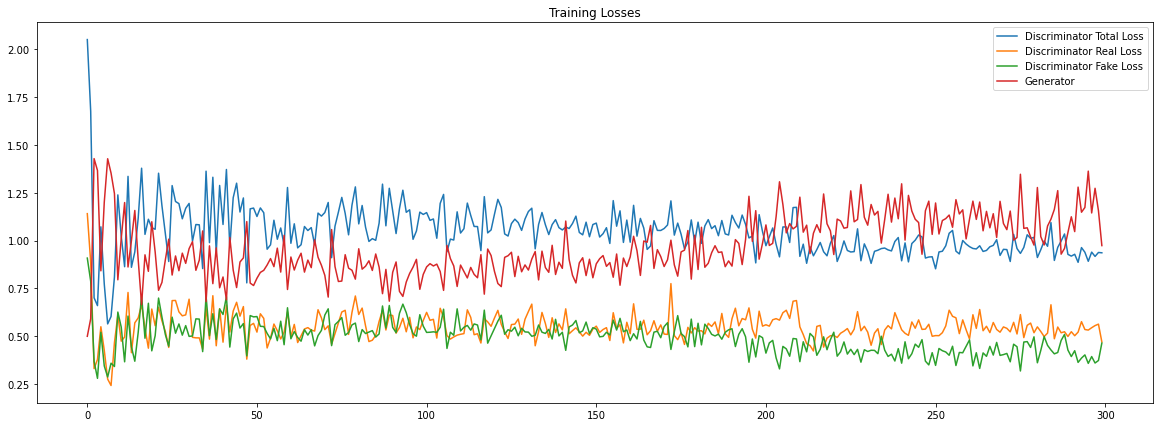

In [36]:
fig, ax = plt.subplots(figsize=(20,7))
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator Total Loss')
plt.plot(losses.T[1], label='Discriminator Real Loss')
plt.plot(losses.T[2], label='Discriminator Fake Loss')
plt.plot(losses.T[3], label='Generator')
plt.title("Training Losses")
plt.legend()

# 显示图像

In [37]:
# Load samples from generator taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pickle.load(f)

In [38]:
def view_samples(epoch, samples):
    """
    epoch代表第几次迭代的图像
    samples为我们的采样结果
    """
    fig, axes = plt.subplots(figsize=(7,7), nrows=5, ncols=5, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch][1]): # 这里samples[epoch][1]代表生成的图像结果，而[0]代表对应的logits
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((9,9)), cmap='Greys_r')
    
    return fig, axes

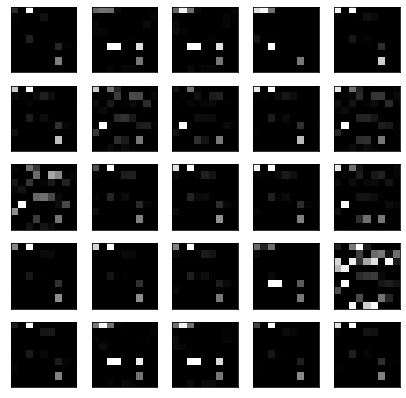

In [39]:
_ = view_samples(-1, samples) # 显示最后一轮的outputs

# 显示整个生成过程图片

In [40]:
# 指定要查看的轮次
epoch_idx = [0, 5, 10, 20, 40, 60, 80, 100, 150, 250] # 一共300轮，不要越界
# epoch_idx = [0, 5, 10, 20, 40, 60, 80, 100] # 一共120轮，不要越界
show_imgs = []
for i in epoch_idx:
    show_imgs.append(samples[i][1])

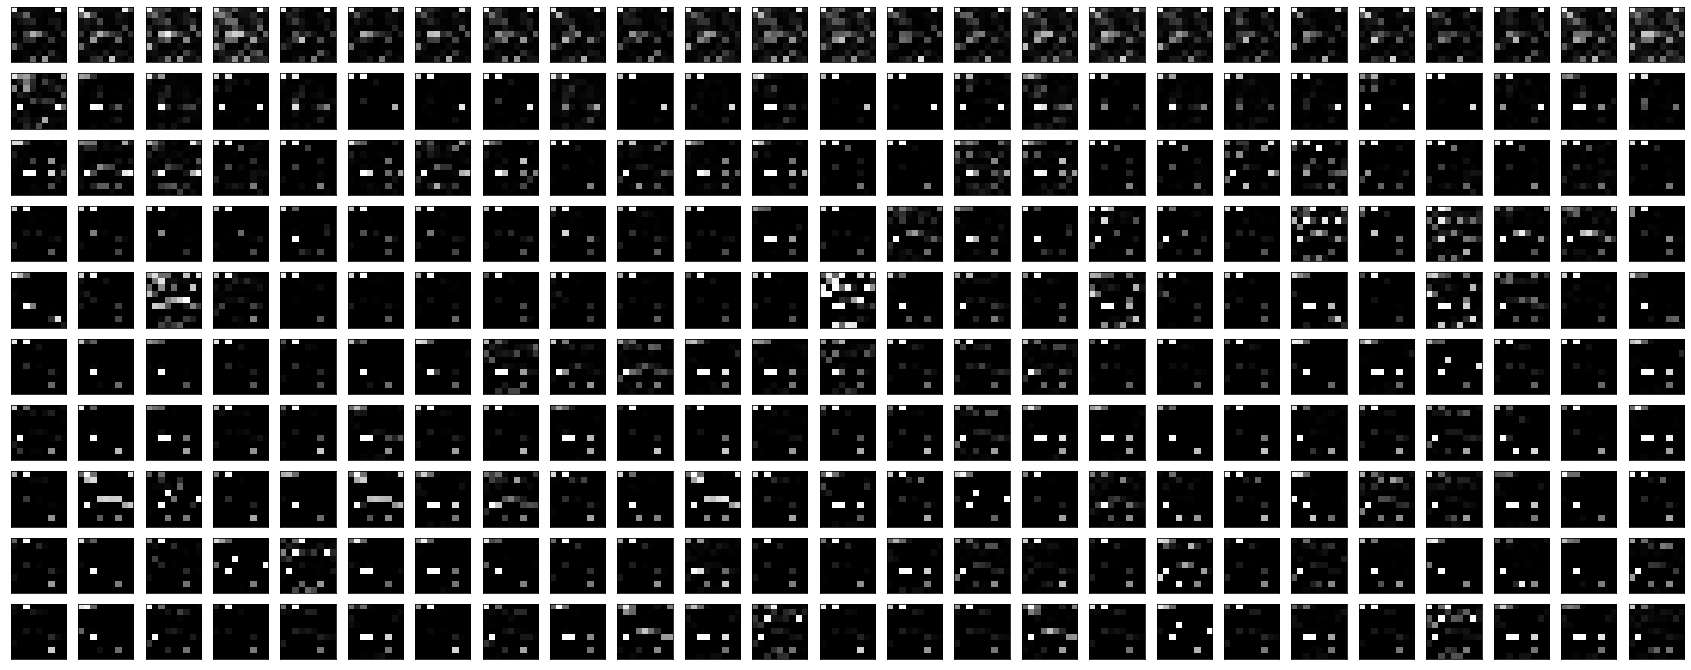

In [41]:
# 指定图片形状
rows, cols = 10, 25
fig, axes = plt.subplots(figsize=(30,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

idx = range(0, epochs, int(epochs/rows))

for sample, ax_row in zip(show_imgs, axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((9,9)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

# 生成新的图片

In [42]:
# 加载我们的生成器变量
saver = tf.train.Saver(var_list=g_vars)
# print(g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_noise = np.random.uniform(-1, 1, size=(25, noise_size))
    # print(sample_noise)
    gen_samples = sess.run(get_generator(noise_img, img_size, g_units, reuse=True),
                           feed_dict={noise_img: sample_noise})


INFO:tensorflow:Restoring parameters from checkpoints\generator.ckpt


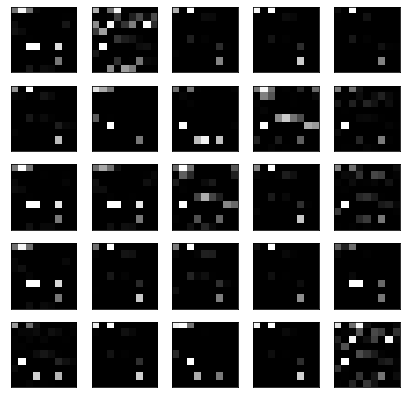

In [43]:
_ = view_samples(0, [gen_samples])